##Import Dependicies

In [ ]:
from osgeo import gdal
import numpy as np
from matplotlib import pyplot as plt
import os

## Get the Dataset

In [ ]:
if not os.path.exists("/content/dset-s2"):
  !wget https://zenodo.org/record/5205674/files/dset-s2.zip
  !unzip dset-s2.zip

## Walk Through the Data Folder

In [ ]:
folder_path = "/content/dset-s2"
for dirpath, dirnames, filenames in os.walk(folder_path):
  print("There are {} directories and {} images in '{}'.".format(len(dirnames), len(filenames), dirpath))

There are 4 directories and 0 images in '/content/dset-s2'.
There are 0 directories and 64 images in '/content/dset-s2/tra_truth'.
There are 0 directories and 31 images in '/content/dset-s2/val_scene'.
There are 0 directories and 31 images in '/content/dset-s2/val_truth'.
There are 0 directories and 64 images in '/content/dset-s2/tra_scene'.


## Training and Validation Data Paths

In [ ]:
train_images_path = '/content/dset-s2/tra_scene'
train_masks_path = '/content/dset-s2/tra_truth'
val_images_path = '/content/dset-s2/val_scene'
val_masks_path = '/content/dset-s2/val_truth'

## Visualizing the Training Images and Masks

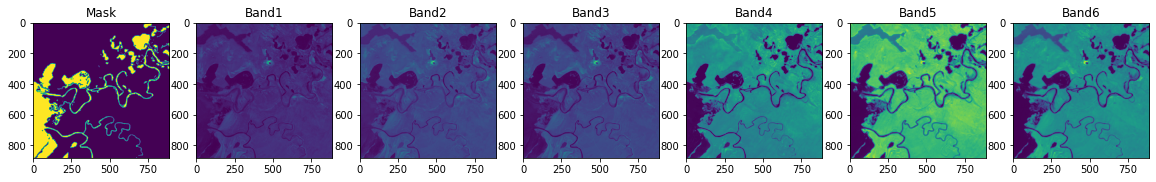

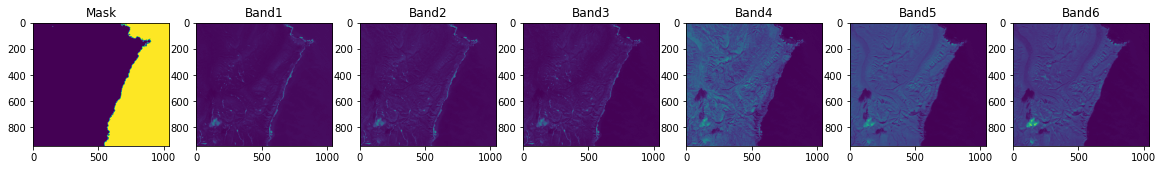

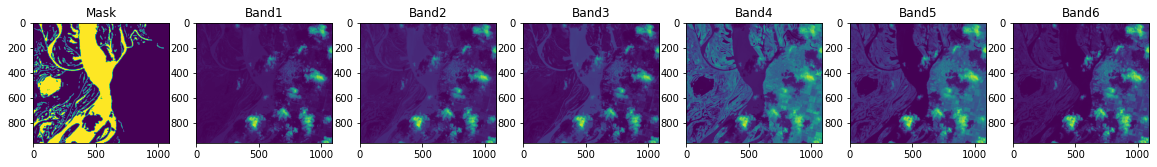

In [ ]:
for n, image in enumerate(os.listdir(train_images_path)[:3]):
  image_path = os.path.join(train_images_path, image)
  mask_path = image_path.split('_')[0] + "_truth/" + image_path.split('_')[1].split('/')[1] + "_" + "_".join(image_path.split('_')[2:-2]) + "_" + image_path.split('_')[-1].split(".")[0] + "_Truth.tif"
  image_ds = gdal.Open(image_path)
  mask_ds = gdal.Open(mask_path)
  num_bands = image_ds.RasterCount

  fig = plt.figure(figsize=(20,20))
  ax = fig.add_subplot(1,num_bands+1,1)
  ax.imshow(mask_ds.ReadAsArray().astype(np.int16))
  ax.set_title("Mask")
  for i in range(1, num_bands+1):
    ax = fig.add_subplot(1,num_bands+1,i+1)
    ax.imshow(image_ds.GetRasterBand(i).ReadAsArray().astype(np.int16))
    ax.set_title("Band" + str(i))

  image_ds = None
  mask_ds = None

##Statistical Image Analysis Images

1. **Normalized Difference Water Index (NDWI):**
> Normalize Difference Water Index (NDWI) is use for the water bodies analysis. The index uses Green and Near InfraRed (NIR) bands of remote sensing images. The NDWI can enhance water information efficiently in most cases. It is sensitive to build-up land and result in over-estimated water bodies. The NDWI products can be used in conjunction with NDVI change products to assess context of apparent change areas. **Generally, water bodies NDWI value is greater than 0.5.**

> $\text{NDWI} = \frac{\text{Green} - \text{NIR}}{\text{Green} + \text{NIR}}$

2. **Modified Normalized Difference Water Index (MNDWI):**
> The Modified Normalized Difference Water Index (MNDWI) uses green and Short Wave InfraRed (SWIR) bands for the enhancement of open water features. It also diminishes built-up area features that are often correlated with open water in other indices. 

> $\text{MNDWI} = \frac{\text{Green} - \text{SWIR}}{\text{Green} + \text{SWIR}}$

3. **Normalized Difference Vegetation Index (NDVI):**

> The Normalized Difference Vegetation Index (NDVI) is the most commonly used vegetation index for observe greenery globally. It also shows sensitivity to the surface moisture level. **NDVI = -1 to 0 represent Water bodies.**

> $\text{NDVI} = \frac{\text{NIR} - \text{Red}}{\text{NIR} + \text{Red}}$


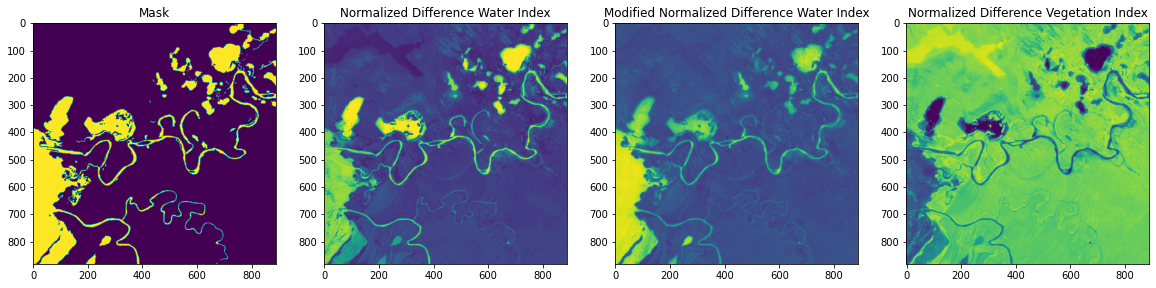

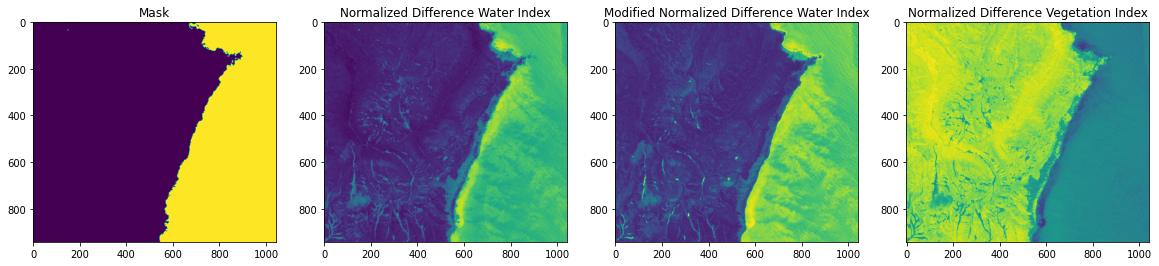

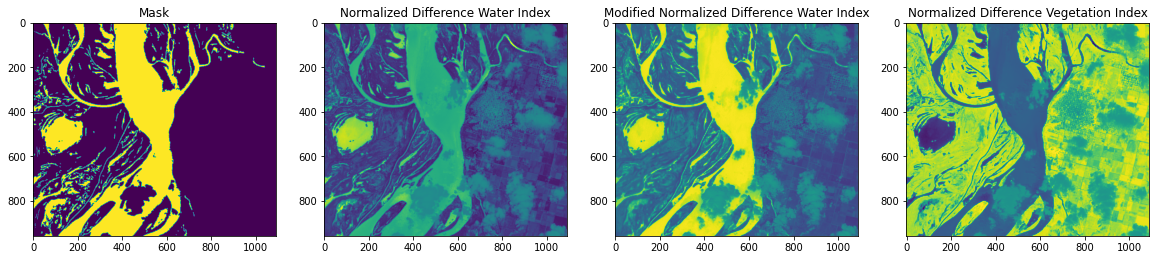

In [ ]:
for n, image in enumerate(os.listdir(train_images_path)[:3]):
  image_path = os.path.join(train_images_path, image)
  mask_path = image_path.split('_')[0] + "_truth/" + image_path.split('_')[1].split('/')[1] + "_" + "_".join(image_path.split('_')[2:-2]) + "_" + image_path.split('_')[-1].split(".")[0] + "_Truth.tif"
  image_ds = gdal.Open(image_path)
  mask_ds = gdal.Open(mask_path)
  
  blue_channel = image_ds.GetRasterBand(1).ReadAsArray().astype(np.int16)
  green_channel = image_ds.GetRasterBand(2).ReadAsArray().astype(np.int16)
  red_channel = image_ds.GetRasterBand(3).ReadAsArray().astype(np.int16)
  NIR_channel = image_ds.GetRasterBand(4).ReadAsArray().astype(np.int16)
  SWIR1_channel = image_ds.GetRasterBand(5).ReadAsArray().astype(np.int16)
  SWIR2_channel = image_ds.GetRasterBand(6).ReadAsArray().astype(np.int16)

  NDWI = np.divide(np.subtract(green_channel, NIR_channel), np.add(green_channel, NIR_channel))
  MNDWI = np.divide(np.subtract(green_channel, SWIR1_channel), np.add(green_channel, SWIR1_channel))
  NDVI = np.divide(np.subtract(NIR_channel, red_channel), np.add(NIR_channel, red_channel))

  fig, ax = plt.subplots(1, 4, figsize=(20,20))
  ax[0].imshow(mask_ds.ReadAsArray().astype(np.int16))
  ax[0].set_title("Mask")
  ax[1].imshow(NDWI)
  ax[1].set_title("Normalized Difference Water Index")
  ax[2].imshow(MNDWI)
  ax[2].set_title("Modified Normalized Difference Water Index")
  ax[3].imshow(NDVI)
  ax[3].set_title("Normalized Difference Vegetation Index")

  mask_ds = None
  image_ds = None

##Clipped the region of intrest (i.e. water area) from a sample image and calculate the values of statistical indexes.

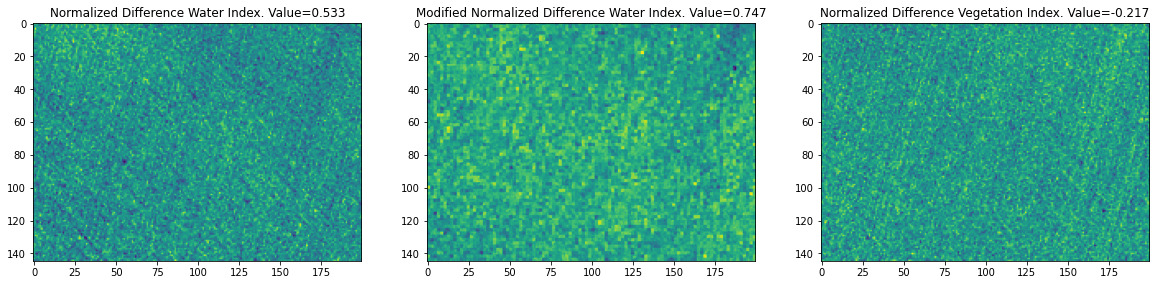

In [ ]:
fn = '/content/dset-s2/tra_scene/S2A_L2A_20190125_N0211_R034_6Bands_S3.tif'
ds = gdal.Open(fn)

img = ds.ReadAsArray().astype(np.int16)
clipped_img = img[:,550:,:200]
clipped_blue_channel = clipped_img[0,:,:]
clipped_green_channel = clipped_img[1,:,:]
clipped_red_channel = clipped_img[2,:,:]
clipped_NIR_channel = clipped_img[3,:,:]
clipped_SWIR1_channel = clipped_img[4,:,:]
clipped_SWIR2_channel = clipped_img[5,:,:]

clipped_NDWI = np.divide(np.subtract(clipped_green_channel, clipped_NIR_channel), np.add(clipped_green_channel, clipped_NIR_channel))
clipped_MNDWI = np.divide(np.subtract(clipped_green_channel, clipped_SWIR1_channel), np.add(clipped_green_channel, clipped_SWIR1_channel))
clipped_NDVI = np.divide(np.subtract(clipped_NIR_channel, clipped_red_channel), np.add(clipped_NIR_channel, clipped_red_channel))

mean_NDWI = np.mean(clipped_NDWI)
mean_MNDWI = np.mean(clipped_MNDWI)
mean_NDVI = np.mean(clipped_NDVI)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,20))
ax0.imshow(clipped_NDWI)
ax0.set_title("Normalized Difference Water Index. Value={:.3}".format(mean_NDWI))
ax1.imshow(clipped_MNDWI)
ax1.set_title("Modified Normalized Difference Water Index. Value={:.3}".format(mean_MNDWI))
ax2.imshow(clipped_NDVI)
ax2.set_title("Normalized Difference Vegetation Index. Value={:.3}".format(mean_NDVI))

ds = None

**Note:** All Indexes Values (i.e. NDWI, MNDWI, NDVI) for water areas are in water observing range values which shows the accurate detection of water bodies in the images.

#Conclusions
1. The NDWI, MNDWI and NDVI performs really well in this dataset.
2. The masks look good and accurate.
3. Number of images are not very high but we can handle this problem with data augmentation.
4. We can also increase the training images by taking some from validation images with 80:20 ratio